In [6]:
pip install mediapipe

  Using cached mediapipe-0.10.14-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
Using cached mediapipe-0.10.14-cp310-cp310-win_amd64.whl (50.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Forçar a implementação do Protobuf para evitar incompatibilidades
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

# Importação das bibliotecas necessárias
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Verifico se a biblioteca foi importada corretamente
if 'mp' in globals():
    # Defino o caminho para o diretório que contém as imagens dos bovinos
    images_path = r"C:\Users\wasse\Downloads\pose-estimation\animalpose_image_part2\cow"
    output_path = "output_images"  # Diretório para salvar as imagens processadas com poses

    # Verifico se o diretório de saída existe, se não, crio-o
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Inicializo o MediaPipe para estimativa de pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)
    mp_drawing = mp.solutions.drawing_utils

    # Função para carregar e processar imagens usando MediaPipe Pose
    def process_image(image_path):
        # Leio a imagem usando OpenCV e converto de BGR para RGB, pois o MediaPipe utiliza o formato RGB
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Aplico a estimativa de pose na imagem carregada
        results = pose.process(image_rgb)

        # Verifico se alguma pose foi detectada
        if results.pose_landmarks:
            # Desenho os pontos-chave e conexões na imagem original usando o MediaPipe Drawing
            mp_drawing.draw_landmarks(
                image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
            )
            # Converto de volta a imagem para RGB antes de salvar com matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Salvo a imagem processada no diretório de saída
            output_image_path = os.path.join(output_path, os.path.basename(image_path))
            plt.imsave(output_image_path, image_rgb)
            return image_rgb
        else:
            print(f"Não foi possível detectar poses na imagem: {os.path.basename(image_path)}")
            return None

    # Carrego todas as imagens do diretório especificado
    image_files = [os.path.join(images_path, img) for img in os.listdir(images_path) if img.endswith('.jpg') or img.endswith('.jpeg')]

    # Processo cada imagem individualmente e exibo um exemplo de imagem processada com a estimativa de pose
    for image_file in image_files[:5]:  # Exemplo com as 5 primeiras imagens
        processed_image = process_image(image_file)
        if processed_image is not None:
            # Exibo a imagem processada usando matplotlib
            plt.figure(figsize=(10, 10))
            plt.imshow(processed_image)
            plt.title(f"Pose Estimation - {os.path.basename(image_file)}")
            plt.axis('off')
            plt.show()

    # Libero os recursos do MediaPipe após o processamento
    pose.close()
else:
    print("Alguma das bibliotecas necessárias não foi importada. Verifique as instalações.")


Não foi possível detectar poses na imagem: co1.jpeg
Não foi possível detectar poses na imagem: co10.jpeg
Não foi possível detectar poses na imagem: co100.jpeg
Não foi possível detectar poses na imagem: co101.jpeg
Não foi possível detectar poses na imagem: co102.jpeg


c:\Users\wasse\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


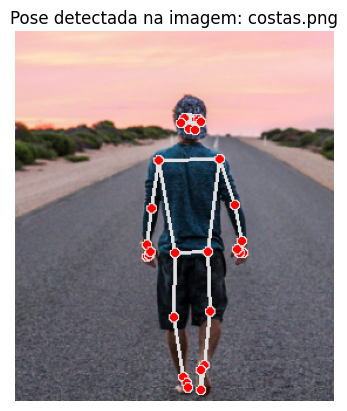

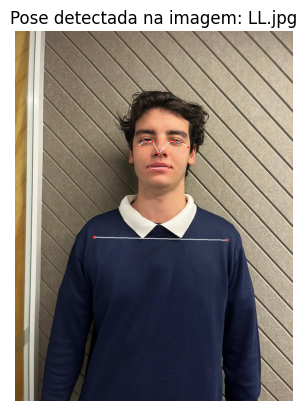

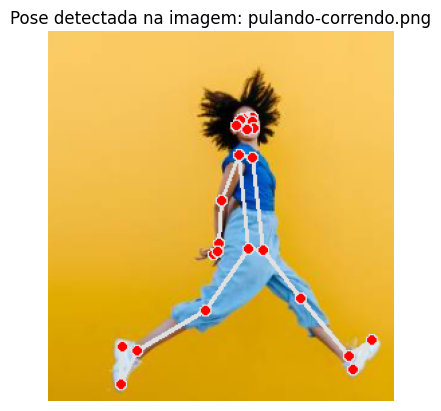

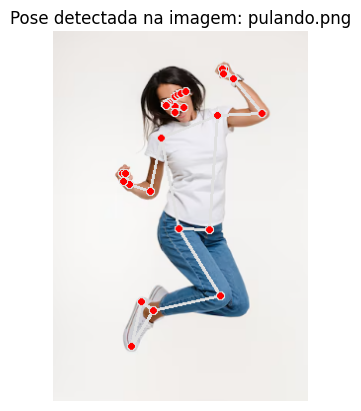

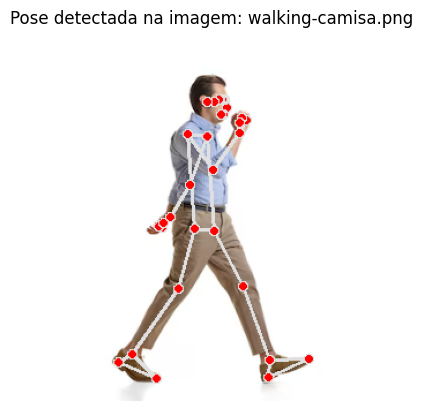

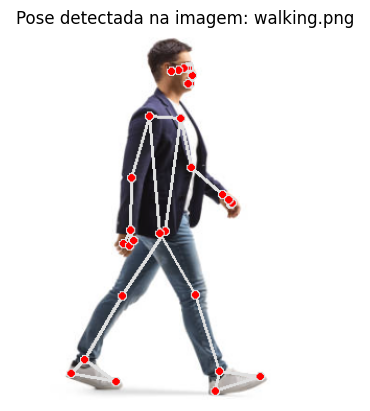

In [11]:
# Importação das bibliotecas necessárias
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os

# Inicializar o mediapipe para detecção de poses humanas
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

# Caminho para o dataset de imagens humanas
human_images_path = r"C:\Users\wasse\Downloads\pose-estimation\imagens-humanos"

# Rodar detecção de pose em cada imagem humana
for image_name in os.listdir(human_images_path):
    image_path = os.path.join(human_images_path, image_name)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Não foi possível carregar a imagem: {image_name}")
        continue
    
    # Converter a imagem para RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detectar pose
    results = pose.process(image_rgb)
    
    if not results.pose_landmarks:
        print(f"Não foi possível detectar pose na imagem: {image_name}")
        continue
    
    # Desenhar landmarks na imagem
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    # Mostrar a imagem com as landmarks
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Pose detectada na imagem: {image_name}")
    plt.show()

pose.close()
